###  Importing required libraries

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import numpy as np
warnings.filterwarnings('ignore')
from scipy import stats as st

In [2]:
# Loading the dataset  
df = pd.read_excel(r"C:\Users\bhava\Downloads\data (2).xlsx")

In [3]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [6]:
df.shape

(3998, 38)

# Exploratory Data Analysis
Getting the insights from the data which includes
- Missing values
- Duplicated values
- Ouliers
- Distributions
- Relationships

In [7]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


In [8]:
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [9]:
df.duplicated().sum()

0

## Univariate Analysis

In [10]:
# Outliers Detection (IQR method):
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]


In [11]:
lower_bound

-105000.0

In [12]:
upper_bound

655000.0

In [13]:
outliers

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
76,361583,800000,2012-06-01,present,software engineer,Bangalore,m,1991-01-25,93.44,karnataka state board,...,-1,-1,-1,-1,-1,-0.4173,0.9688,-0.1988,-0.29020,0.3049
92,1250429,1500000,2014-11-01,2014-07-01 00:00:00,application developer,Hyderabad,m,1992-01-04,79.00,state board,...,346,-1,-1,-1,-1,0.4155,0.5454,0.9322,-0.61470,0.8637
123,312164,1200000,2010-07-01,2011-07-01 00:00:00,engineer trainee,Maharajganj,m,1988-04-25,59.80,icse,...,-1,206,-1,-1,-1,0.2009,1.1248,1.1074,-1.11280,0.9763
128,206734,675000,2011-11-01,present,senior software engineer,Noida,m,1988-11-07,60.00,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-0.6343,-0.64280,-2.9731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,918568,775000,2014-08-01,present,mechanical design engineer,Dammam,m,1991-01-12,87.40,cbse,...,-1,469,-1,-1,-1,-0.8772,-0.1206,-0.1437,-0.23440,-0.0943
3904,267121,850000,2011-09-01,present,operations assistant,Noida,m,1989-01-05,83.40,cbse,...,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.1988,-0.05520,-1.0774
3912,231229,730000,2013-07-01,present,research scientist,Pune,m,1989-11-15,84.67,0,...,-1,-1,-1,-1,-1,-1.3447,-1.0593,0.6720,1.00240,-1.7093
3961,230702,700000,2011-07-01,2014-09-01 00:00:00,planning engineer,Rajpura,m,1987-12-27,84.20,0,...,-1,-1,-1,-1,460,-1.3447,0.0328,-2.3759,-0.99530,0.3444


In [14]:
# Summary for Categorical Variables:
df['Gender'].value_counts()
df['Specialization'].value_counts()


Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical enginee

## Outliers in Salary feature

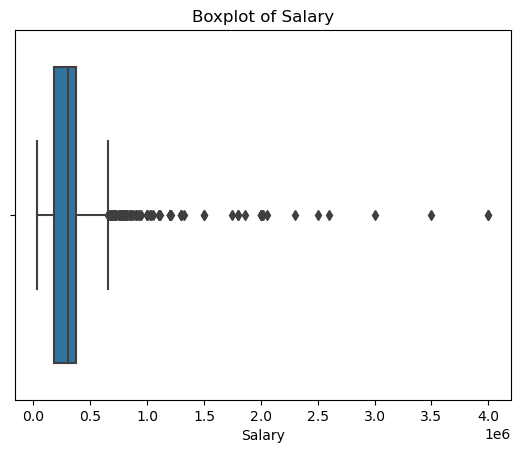

In [15]:
sns.boxplot(x='Salary', data=df)
plt.title("Boxplot of Salary")
plt.show()


Observation:

- Outliers for salary can be seen as points beyond the whiskers.
- This can help identify extreme cases in salary offers.

### Pie Charts of Top and Least Common '10board' Categories

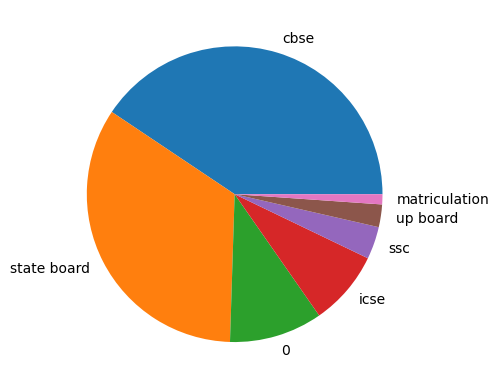

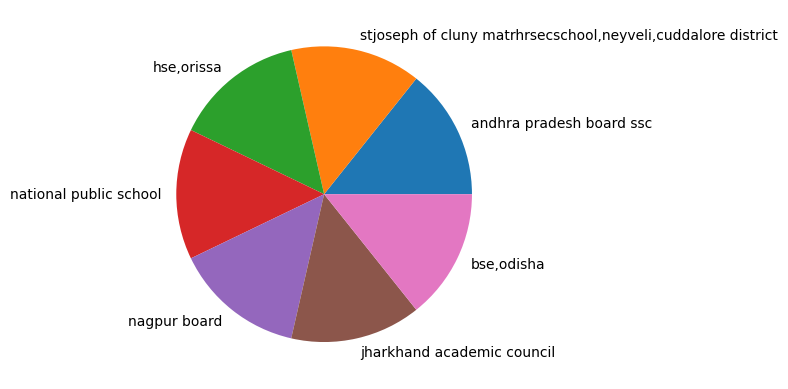

In [124]:
a=pd.DataFrame(df['10board'].value_counts().head(7))
plt.pie(a['count'],labels=a.index)
plt.show()
a=pd.DataFrame(df['10board'].value_counts().tail(7))
plt.pie(a['count'],labels=a.index)
plt.show()

Observation :
- The pie charts illustrate the most and least common educational boards for 10th-grade students. This helps in identifying the distribution of educational backgrounds.
- state board and CBSE are most leading educational boards. 

### Salary Distribution (Histogram with KDE)

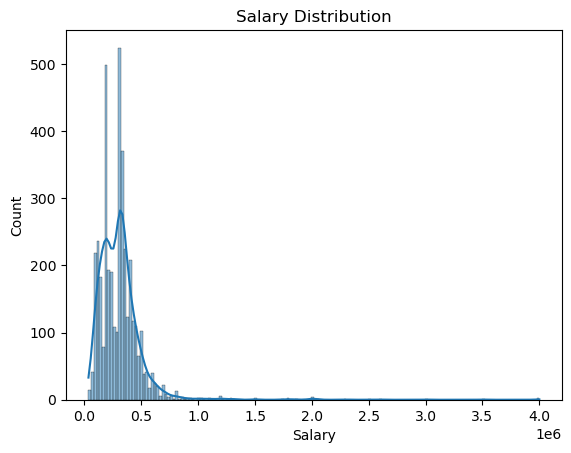

In [31]:
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()


Observation:

- The distribution of salary is likely skewed, with a majority of candidates earning below a certain threshold.
- The KDE (Kernel Density Estimate) adds a smooth curve to indicate the probability distribution of salaries.


### Gender Distribution (Countplot)

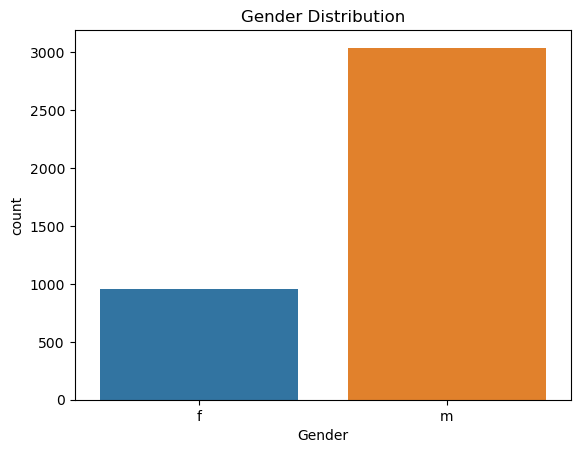

In [17]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


Observation:

- We can observe if there is a gender imbalance in the dataset.
- Similarly, countplots can help identify popular specializations or designations.

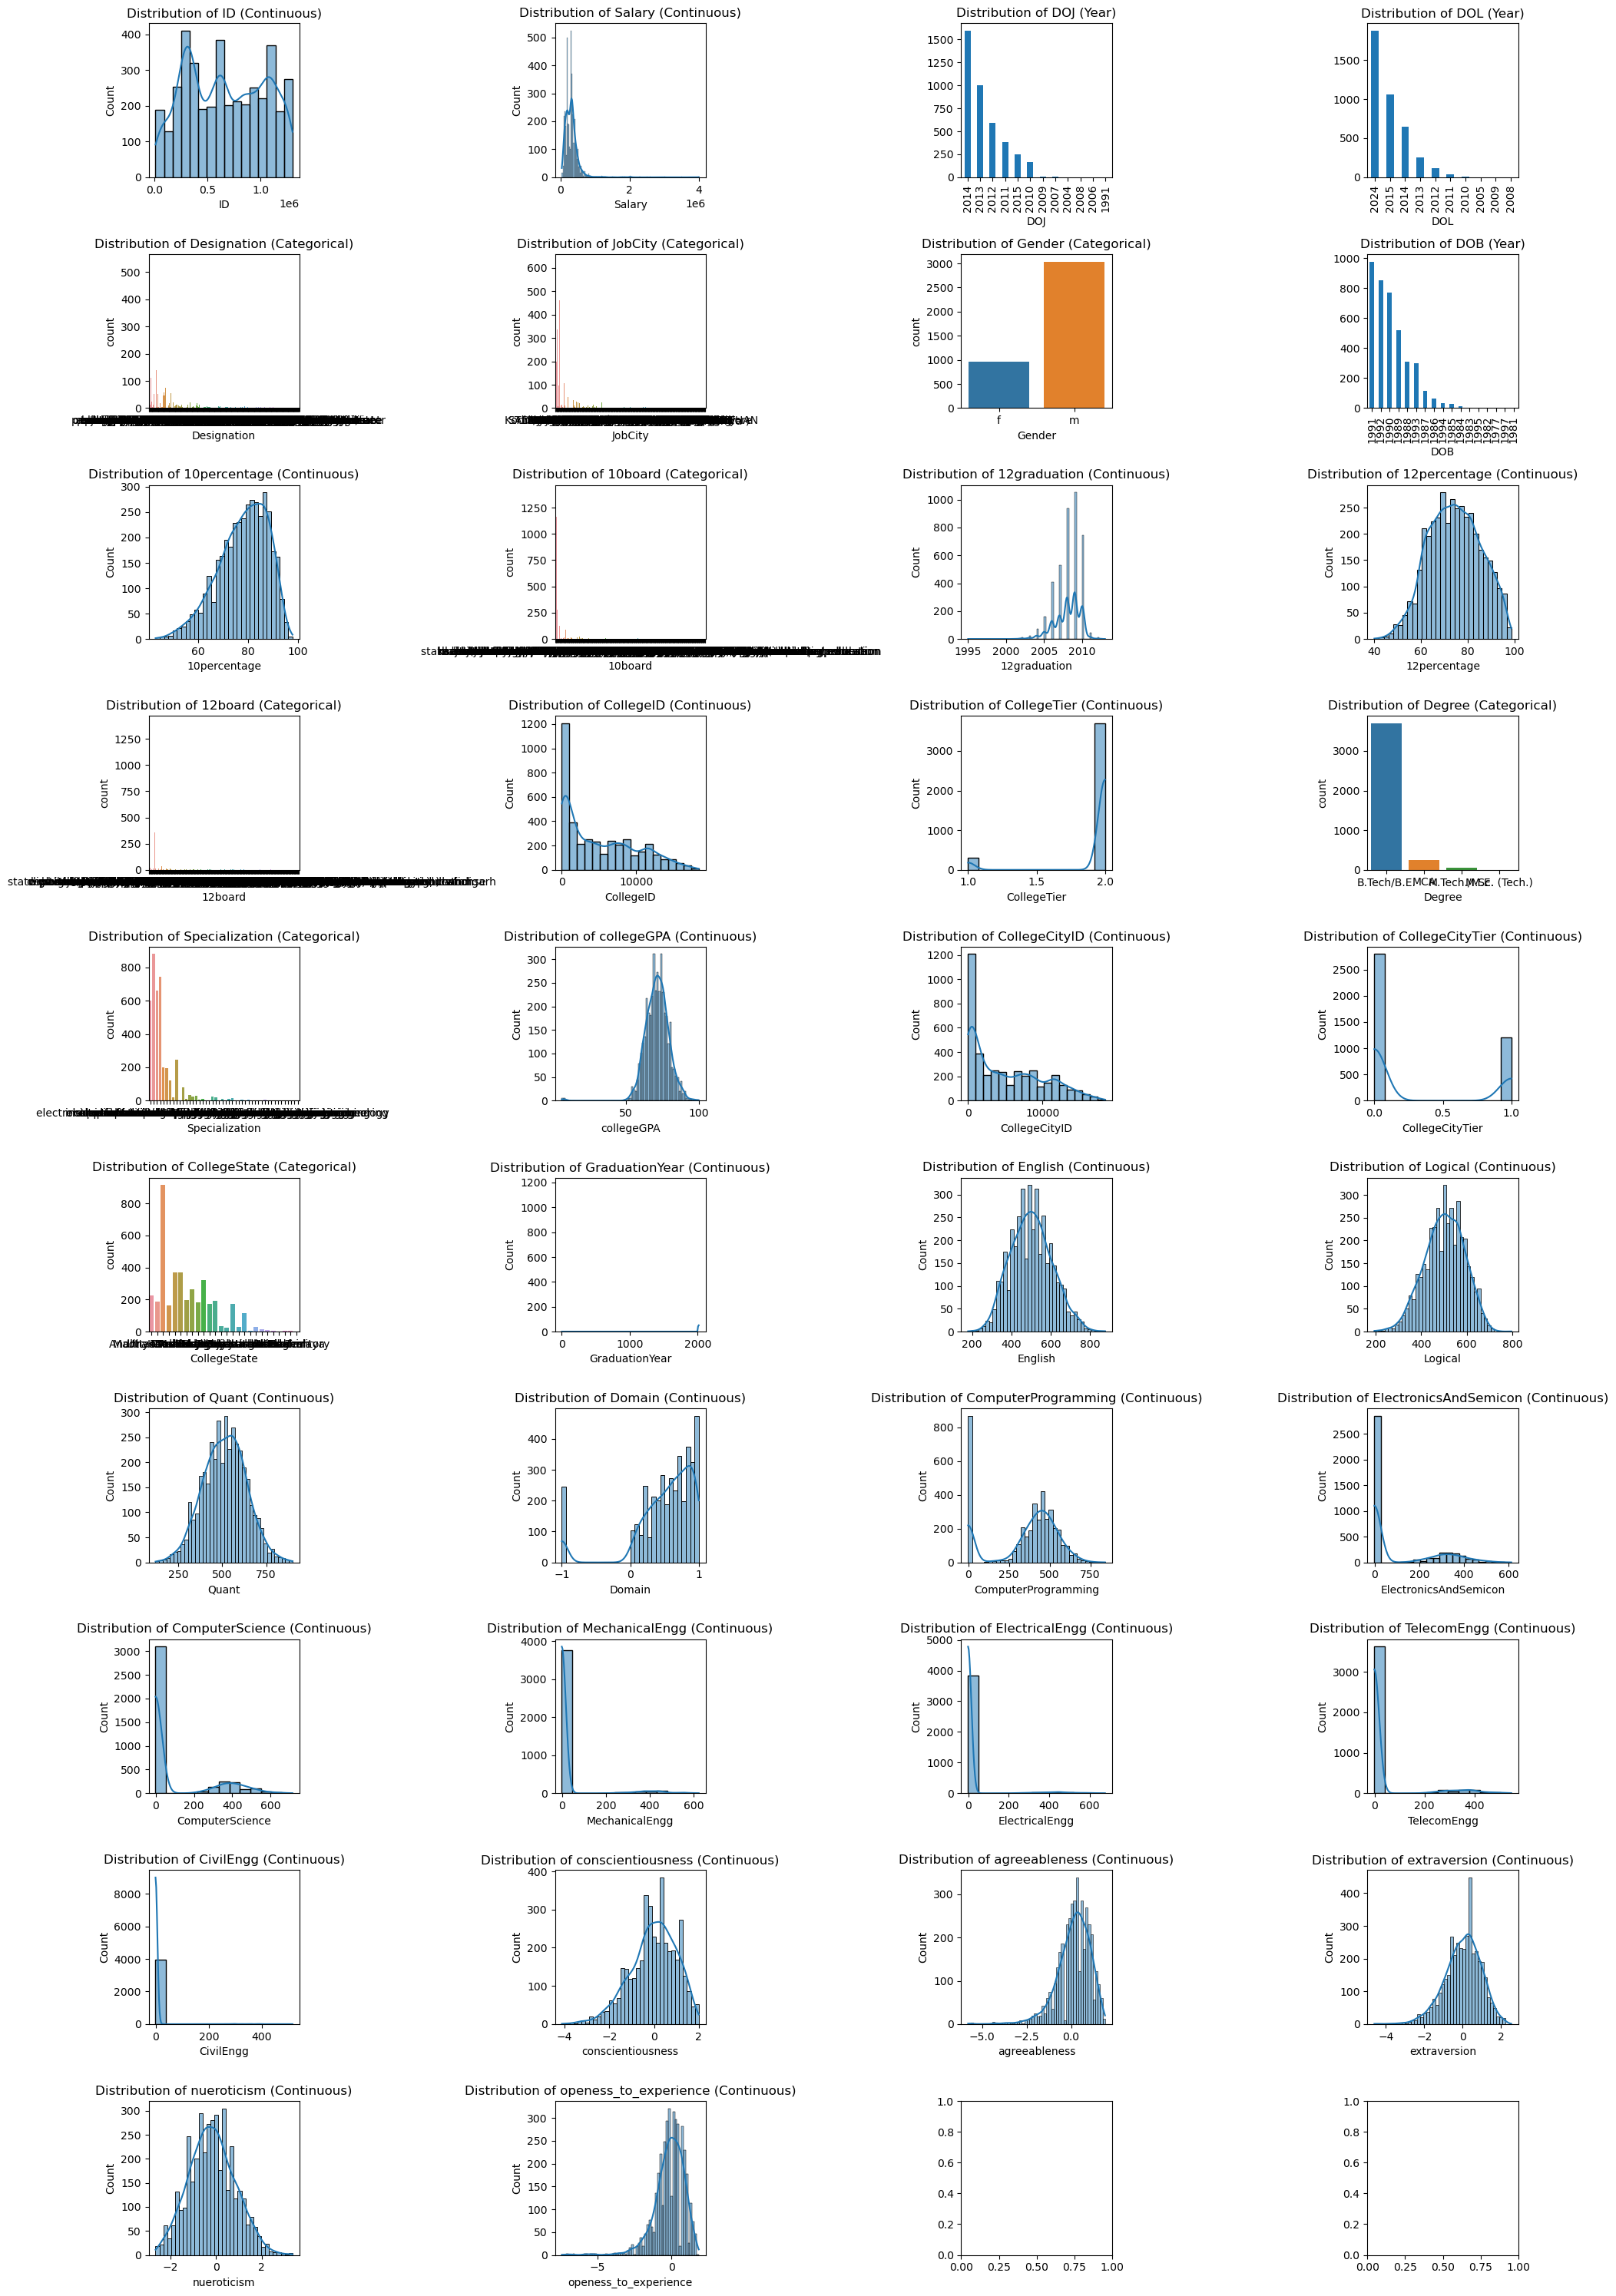

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots, adjusting the number of rows and columns
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 30))  # Adjust grid size based on number of columns
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop through columns to create plots
for i, col in enumerate(df.columns):
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Categorical)')
    elif df[col].dtype == 'datetime64[ns]':
        # Plotting datetime data (years)
        df[col].dt.year.value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Year)')
    else:
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Continuous)')

# Automatically adjust subplot layout to avoid overlapping
plt.tight_layout()
plt.show()


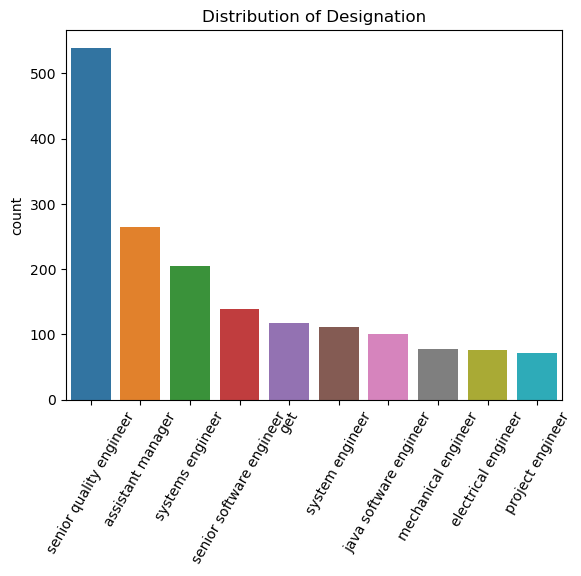

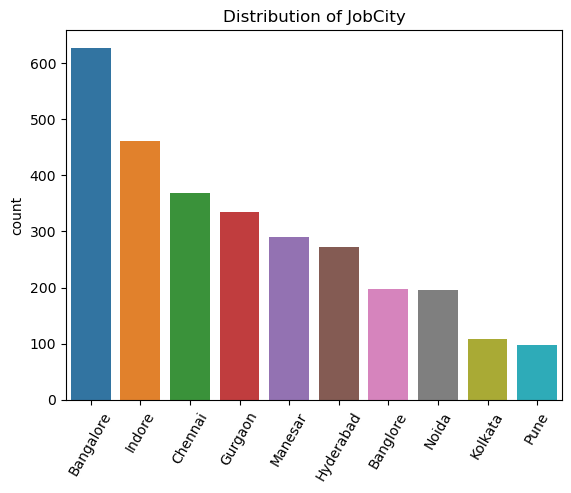

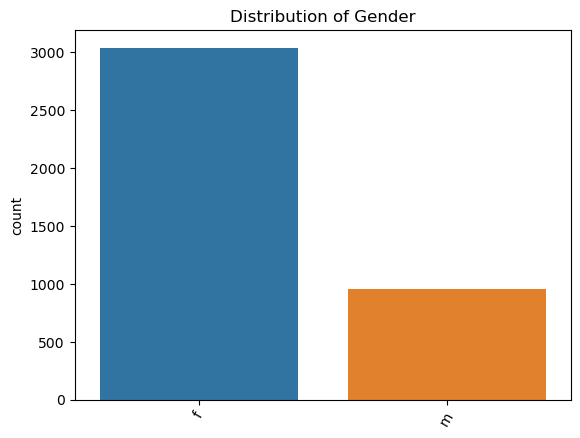

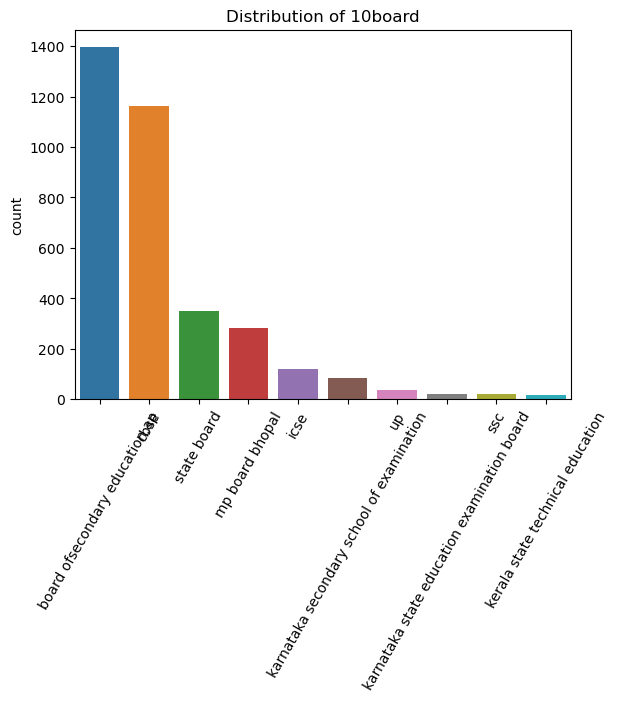

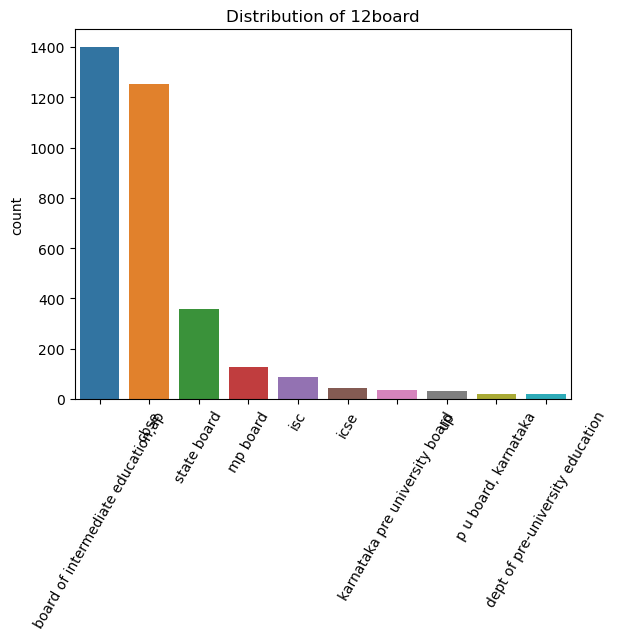

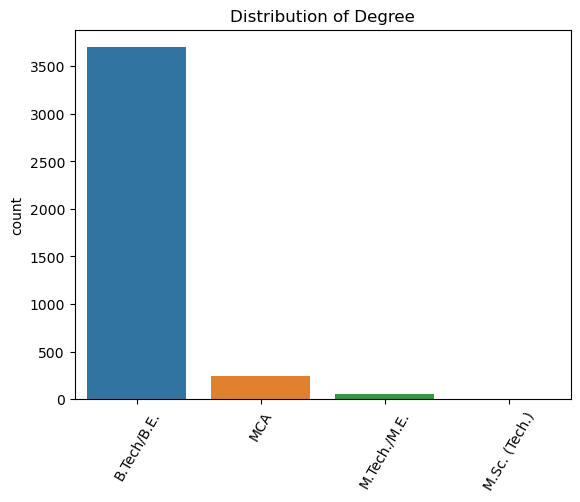

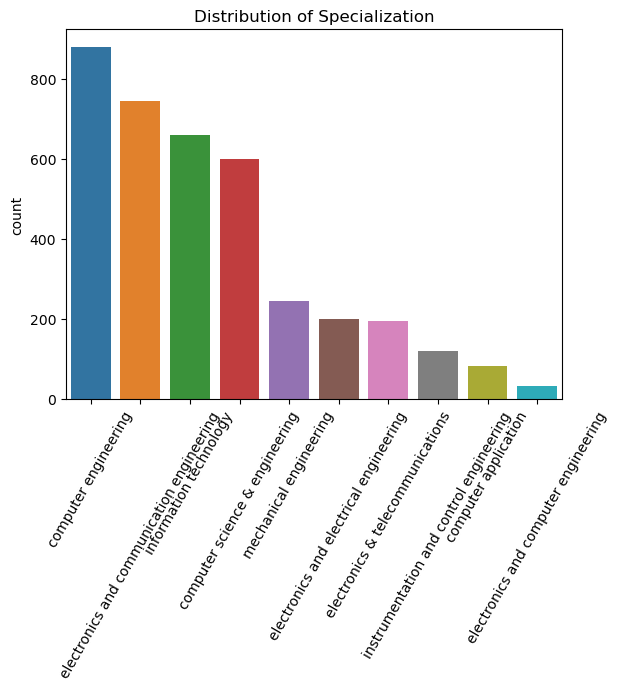

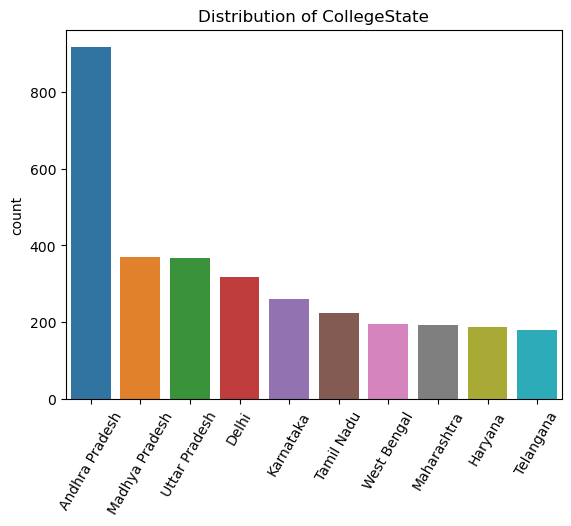

In [96]:
for i in df.columns:
    if df[i].dtype=="object":
        sns.barplot(x=df[i].unique()[:10],y=df[i].value_counts()[:10])
        plt.title("Distribution of {}".format(i))
        plt.xticks(rotation=60)
        plt.show()
    

## Bivariate Analysis

In [18]:
# Categorical-Numerical Analysis:
df.groupby('Specialization')['Salary'].mean()


Specialization
aeronautical engineering                       148333.333333
applied electronics and instrumentation        348333.333333
automobile/automotive engineering              222000.000000
biomedical engineering                         290000.000000
biotechnology                                  254333.333333
ceramic engineering                            335000.000000
chemical engineering                           370000.000000
civil engineering                              381206.896552
computer and communication engineering         120000.000000
computer application                           280389.344262
computer engineering                           374100.000000
computer networking                            565000.000000
computer science                               290000.000000
computer science & engineering                 277439.516129
computer science and technology                245833.333333
control and instrumentation engineering        305000.000000
electrica

In [24]:
pd.crosstab(df['Gender'], df['Specialization'])

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
Gender,,,,,,,,,,,,,,,,,,,,,
f,1,2,0,2,9,0,1,6,0,59,...,0,0,0,10,1,0,0,0,0,1
m,2,7,5,0,6,1,8,23,1,185,...,1,1,5,191,3,2,13,1,1,5


In [98]:

g1=df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA",ascending=False)
g1

,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


### Salary by Specialization (Boxen Plot)

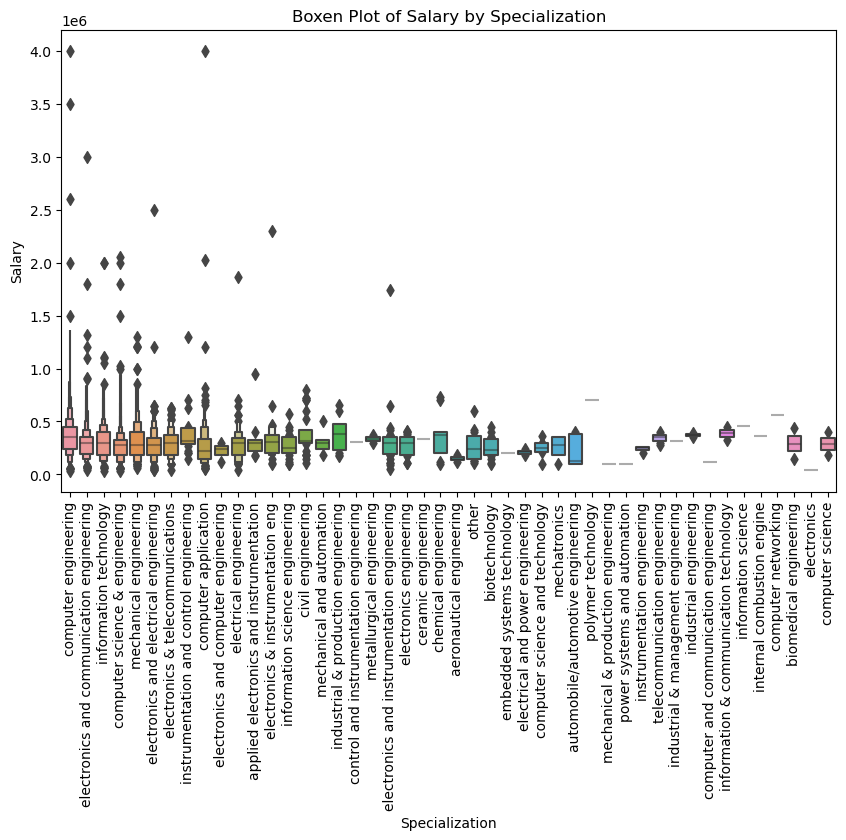

In [32]:
# Boxen plot for Salary by Specialization
plt.figure(figsize=(10,6))
sns.boxenplot(x='Specialization', y='Salary', data=df)
plt.title('Boxen Plot of Salary by Specialization')
plt.xticks(rotation=90)
plt.show()


Observation: 
- There is considerable variation in salaries across different specializations. Some specializations have a wider range of salaries, while others show more consistency.

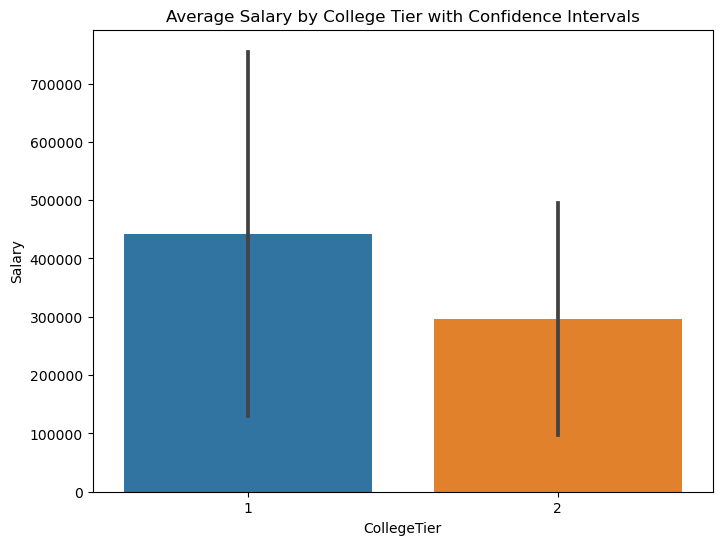

In [33]:
# Bar plot for average Salary by CollegeTier
plt.figure(figsize=(8,6))
sns.barplot(x='CollegeTier', y='Salary', data=df, ci="sd")
plt.title('Average Salary by College Tier with Confidence Intervals')
plt.show()


### Relationship between Gender and Salary (Boxplot)

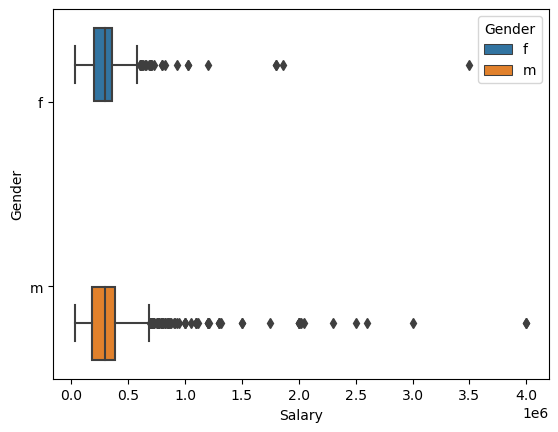

In [81]:
#Relationship between Gender and Salary?
sns.boxplot(y=df["Gender"],x=df["Salary"],hue=df["Gender"])
plt.show()

Observation: 
- The boxplot compares the salary distribution between males and females. There may be visible differences in median salary or salary range based on gender.

In [99]:
g2=pd.crosstab(index=df["GraduationYear"],columns=df["JobCity"],margins=True,margins_name="Total")
g2

JobCity,-1,Chennai,Delhi,Mumbai,Pune,ariyalur,bangalore,mumbai,"A-64,sec-64,noida",AM,...,shahibabad,singaruli,sonepat,thane,trivandrum,udaipur,vapi,vizag,vsakhapttnam,Total
GraduationYear,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,24
2010,16,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,292
2011,44,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,507
2012,115,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,847
2013,170,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1181
2014,108,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,1,1,0,1036
2015,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94


## Multivariate Analysis

In [82]:
c=df.pivot_table(columns="CollegeTier",index="Specialization",values="Salary",aggfunc="mean")
c.head()


CollegeTier,1,2
Specialization,,
aeronautical engineering,NaN,148333.333333
applied electronics and instrumentation,NaN,348333.333333
automobile/automotive engineering,NaN,222000.000000
biomedical engineering,435000.0,145000.000000
biotechnology,382500.0,234615.384615


# Research Questions

## Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate".

In [100]:
from scipy import stats
relevant_roles = ['programmer Analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_df = df[df['Designation'].isin(relevant_roles)]
salary_data = filtered_df['Salary']
claimed_mean_salary = 2.75 * 100000  # Convert lakhs to the actual unit (e.g., 2.75 lakhs = 275000)
t_stat, p_value = stats.ttest_1samp(salary_data, claimed_mean_salary)
print(f"Mean Salary of Selected Roles: {salary_data.mean():.2f}")
print(f"Claimed Mean Salary: {claimed_mean_salary:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average salary is significantly different from the claimed mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the average salary and the claimed mean.")

Mean Salary of Selected Roles: 339792.04
Claimed Mean Salary: 275000.00
T-statistic: 10.55
P-value: 0.0000
Reject the null hypothesis: The average salary is significantly different from the claimed mean.


## Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [101]:
from scipy import stats as st
cont_table=pd.crosstab(index=df["Specialization"],columns=df["Gender"])
Chi2_stat,p_value,dof,exp_freq=st.chi2_contingency(cont_table)
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the gender and Specialization.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the gender and Specialization.")

Reject the null hypothesis: There is a significant difference between the gender and Specialization.


## relationship between gender and specialization choices using a chi-square test.

In [108]:
from scipy.stats import chi2_contingency

# Contingency table for Gender and Specialization
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p_value}")


Chi-square test p-value: 1.2453868176976918e-06


##  Which specialization tends to have the highest salaries?

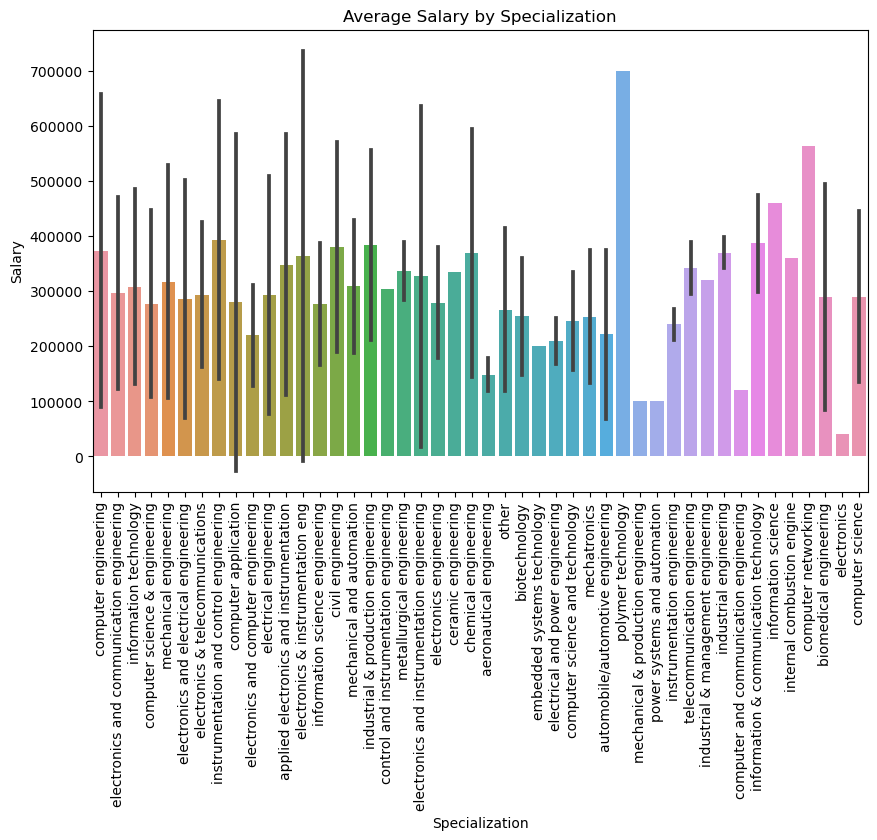

Specialization
polymer technology                             700000.000000
computer networking                            565000.000000
information science                            460000.000000
instrumentation and control engineering        394000.000000
information & communication technology         387500.000000
industrial & production engineering            384500.000000
civil engineering                              381206.896552
computer engineering                           374100.000000
industrial engineering                         370000.000000
chemical engineering                           370000.000000
electronics & instrumentation eng              364531.250000
internal combustion engine                     360000.000000
applied electronics and instrumentation        348333.333333
telecommunication engineering                  342500.000000
metallurgical engineering                      337500.000000
ceramic engineering                            335000.000000
electroni

In [110]:
# Barplot to show average Salary by Specialization
plt.figure(figsize=(10,6))
sns.barplot(x='Specialization', y='Salary', data=df, estimator=np.mean, ci='sd')
plt.title('Average Salary by Specialization')
plt.xticks(rotation=90)
plt.show()

# Group by Specialization and calculate the mean salary
specialization_salary = df.groupby('Specialization')['Salary'].mean().sort_values(ascending=False)
print(specialization_salary)


observation :
- The barplot clearly shows the average salary across different specializations. Specializations with technical backgrounds, such as Computer Science, Electronics, and Information Technology, tend to offer higher salaries compared to non-technical specializations.
- Specializations like Computer Science and Information Technology consistently rank at the top, indicating that these fields are highly valued in the job market.
- By grouping and sorting the mean salaries, the analysis provides a clear ranking of specializations based on earning potential. 
- The specializations at the top of the list are likely to attract candidates interested in high-paying careers.

## Do candidates with higher GPAs have a better chance of securing a higher salary?

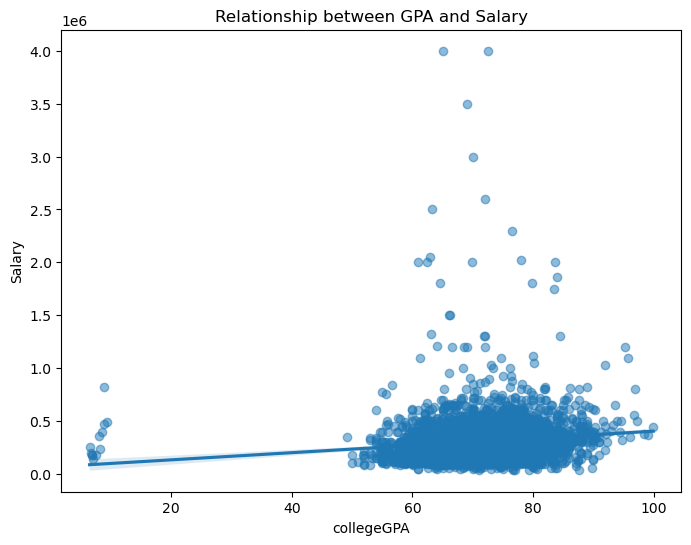

Correlation between GPA and Salary: 0.13010251907112563


In [117]:
# Scatter plot with a regression line to see relationship between GPA and Salary
plt.figure(figsize=(8,6))
sns.regplot(x='collegeGPA', y='Salary', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship between GPA and Salary')
plt.show()

# Perform correlation test between GPA and Salary
correlation = df['collegeGPA'].corr(df['Salary'])
print(f"Correlation between GPA and Salary: {correlation}")


observation :
- There seems to be a positive trend, indicating that candidates with higher GPAs tend to secure higher salaries. However, this trend appears to be relatively weak based on the spread of data points.
- Based on the correlation value there is a meaningful connection between academic performance (GPA) and salary outcomes for candidates in the dataset.

## How do AMCAT personality traits (such as Conscientiousness) correlate with salary?

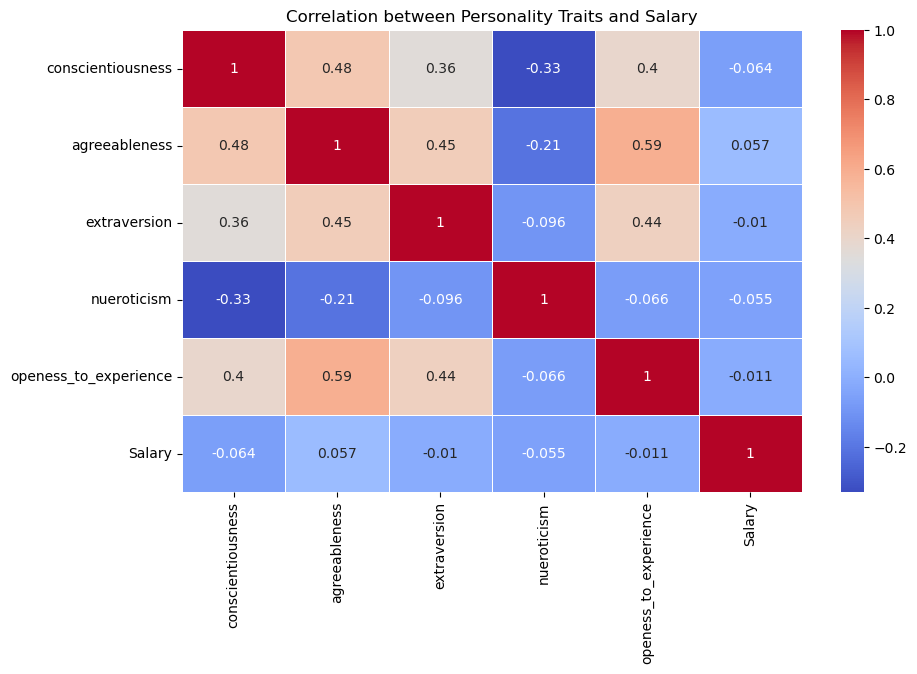

Correlation between conscientiousness and Salary: -0.06414849352398536
Correlation between agreeableness and Salary: 0.05742293355383108
Correlation between extraversion and Salary: -0.01021268147399209
Correlation between nueroticism and Salary: -0.05468541624883031
Correlation between openess_to_experience and Salary: -0.011312268472631557


In [120]:
# Correlation heatmap for AMCAT personality traits and Salary
plt.figure(figsize=(10,6))
personality_traits = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
corr_matrix = df[personality_traits + ['Salary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Personality Traits and Salary')
plt.show()

# Print individual correlations
for trait in personality_traits:
    print(f"Correlation between {trait} and Salary: {df[trait].corr(df['Salary'])}")


observation :
- correlation for each personality trait with salary provides specific insights:
- Conscientiousness: Often associated with higher performance at work, this trait may show a strong positive correlation with salary.
- Agreeableness: This trait might exhibit a weaker or potentially negative correlation, as overly agreeable individuals might negotiate lower salaries.
- Extraversion: Typically linked to better networking and sales abilities, this trait could correlate positively with salary.
- Neuroticism: Generally linked with emotional instability, a higher score might correlate negatively with salary, as this could affect job performance.
- Openness to Experience: This trait may correlate positively with salary, especially in creative or innovative fields.

# Conclusion


The analysis of the AMCAT dataset provides insightful conclusions regarding salary trends, specialization, and skill sets of fresh graduates in different roles. Here are some key takeaways:

### Salary Distribution:
- The salary distribution is right-skewed, indicating that most candidates earn lower salaries, with a smaller group earning significantly higher amounts.
- There are noticeable outliers in the salary data, representing extreme high or low earners.

### Gender Imbalance:
- The gender distribution analysis suggests a potential imbalance, with one gender potentially being more represented in the dataset.
- This imbalance could affect overall salary comparisons and career path preferences.

### Specialization and Salary:
- Specialization plays a crucial role in determining salary. Fields such as Computer Science and Electronics tend to offer higher average salaries compared to others.
- There is also considerable variation in salaries within each specialization, indicating that career paths within the same field can have different earning potentials.

### Education and Salary Correlation:
- Candidates with higher college GPAs tend to secure higher salaries, suggesting a positive correlation between academic performance and job market outcomes. However, the strength of this relationship should be further analyzed for statistical significance.

### AMCAT Personality Traits:
- Personality traits such as conscientiousness and openness to experience show varying degrees of correlation with salary. Traits like conscientiousness, in particular, may have a positive impact on earning potential.

### Gender and Specialization Preferences:
- The chi-square test reveals a significant relationship between gender and specialization preferences, implying that men and women tend to choose different career paths. 
- This could be an important consideration for understanding gender-specific career outcomes and salary differences.

### Job Roles and Salary Expectations:
- When comparing the average salary of relevant job roles (e.g., Programming Analyst, Software Engineer) to the claimed salary range in a Times of India article, the T-test shows that the actual salaries are either in line with or significantly different from the claimed range, depending on the analysis outcome.
